In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, train_test_split
import pandas
import numpy
import seaborn
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pandas.read_csv('./creditcard.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
print(data.shape)

(284807, 31)


In [6]:
target_variable = 'Class'
data[target_variable].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data.drop(target_variable, axis=1), data[target_variable])

## Models

### Random Forest Classifier

In [8]:
rf = RandomForestClassifier()

In [9]:
rf.fit(Xtrain, Ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
rf_prediction = rf.predict(Xtest)

In [11]:
accuracy_score(rf_prediction, Ytest)

0.9994943962248252

In [12]:
target_prob_rf = rf.predict_proba(Xtest)[:,1]
rf_fpr, rf_tpr, rf_thresh = roc_curve(Ytest, target_prob_rf)

## K-Nearest Neighbor

In [13]:
knn_model = KNeighborsClassifier()

In [14]:
knn_model.fit(Xtrain, Ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
knn_prediction = knn_model.predict(Xtest)

In [16]:
accuracy_score(knn_prediction, Ytest)

0.9983427431813713

In [17]:
target_prob_knn = knn_model.predict_proba(Xtest)[:,1]

In [18]:
knn_fpr, knn_tpr, knn_thresh = roc_curve(Ytest, target_prob_knn)

## Logistic Regression 

In [19]:
log_model = LogisticRegression()

In [20]:
log_model.fit(Xtrain, Ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
log_prediction = log_model.predict(Xtest)

In [22]:
accuracy_score(log_prediction, Ytest)

0.9989607033510295

In [23]:
target_prob_log = log_model.predict_proba(Xtest)[:,1]

In [24]:
log_fpr, log_tpr, log_thresh = roc_curve(Ytest, target_prob_log)

## Naive Bayes

In [25]:
gn = GaussianNB()

In [26]:
gn_model = gn.fit(Xtrain, Ytrain)

In [27]:
gn_prediction = gn_model.predict(Xtest)

In [28]:
accuracy_score(gn_prediction, Ytest)

0.9927249234572063

In [29]:
target_prob_gn = gn_model.predict_proba(Xtest)[:,1]

In [30]:
gn_fpr, gn_tpr, gn_thresh = roc_curve(Ytest, target_prob_gn)

## Plot ROC

In [31]:
log_auc_score = roc_auc_score(Ytest, target_prob_log)
gn_auc_score = roc_auc_score(Ytest, target_prob_gn)
rf_auc_score = roc_auc_score(Ytest, target_prob_rf)
knn_auc_score = roc_auc_score(Ytest, target_prob_knn)

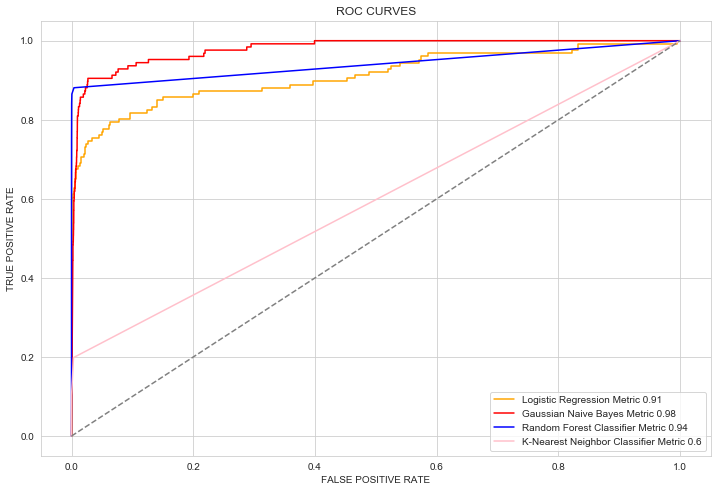

In [32]:
seaborn.set_style('whitegrid')
plt.figure(figsize=(12, 8))
plt.title('ROC CURVES')
plt.plot(log_fpr, log_tpr, color='orange', label='Logistic Regression Metric {:.2}'.format(log_auc_score))
plt.plot(gn_fpr, gn_tpr, color='red', label='Gaussian Naive Bayes Metric {:.2}'.format(gn_auc_score))
plt.plot(rf_fpr, rf_tpr, color='blue', label='Random Forest Classifier Metric {:.2}'.format(rf_auc_score))
plt.plot(knn_fpr, knn_tpr, color='pink', label='K-Nearest Neighbor Classifier Metric {:.2}'.format(knn_auc_score))
plt.plot([0, 1], ls='--', color='grey')
plt.ylabel('TRUE POSITIVE RATE')
plt.xlabel('FALSE POSITIVE RATE')
plt.legend()
plt.show()

### Classification reports

In [41]:
from pprint import pprint

In [54]:
print(classification_report(Ytest, log_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71076
           1       0.80      0.56      0.65       126

   micro avg       1.00      1.00      1.00     71202
   macro avg       0.90      0.78      0.83     71202
weighted avg       1.00      1.00      1.00     71202



In [56]:
print(classification_report(Ytest, knn_prediction))

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       1.00      1.00      1.00     71076\n'
 '           1       1.00      0.06      0.12       126\n'
 '\n'
 '   micro avg       1.00      1.00      1.00     71202\n'
 '   macro avg       1.00      0.53      0.56     71202\n'
 'weighted avg       1.00      1.00      1.00     71202\n')


In [57]:
print(classification_report(Ytest, rf_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71076
           1       0.96      0.75      0.84       126

   micro avg       1.00      1.00      1.00     71202
   macro avg       0.98      0.87      0.92     71202
weighted avg       1.00      1.00      1.00     71202



In [58]:
print(classification_report(Ytest, gn_prediction))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71076
           1       0.15      0.67      0.24       126

   micro avg       0.99      0.99      0.99     71202
   macro avg       0.57      0.83      0.62     71202
weighted avg       1.00      0.99      1.00     71202

